<a href="https://colab.research.google.com/github/Ochan-LOKIDORMOI/Animals_Classification_Model/blob/main/Ochan_LOKIDORMOI_Summative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Overview of the Data**
The document describes a machine learning project focused on classifying images of animals into two categories: wild and domestic. The dataset contains images stored in a Google Drive directory, which are loaded and preprocessed using Python and various machine learning libraries.

# **Importing Libraries**

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import pandas as pd
import os
import cv2
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import pickle

In [ ]:
data = ('/content/drive/MyDrive/animal')

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/animal"
CATEGORIES = ['wild','domestic']


# **Creating the for loop that joins the Image path and the Image Categoriess**

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  print(path)

/content/drive/MyDrive/animal/wild
/content/drive/MyDrive/animal/domestic


In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    print(img_path)
    break

/content/drive/MyDrive/animal/wild/wild (251).jpg
/content/drive/MyDrive/animal/domestic/domestic (1).jpg


# **Listing the images present in the file foolder**

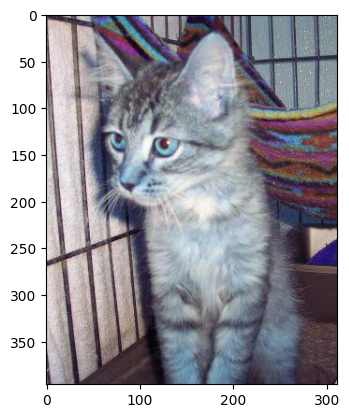

In [ ]:
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    plt.imshow(img_arr)
    break

# **Resizing the images**

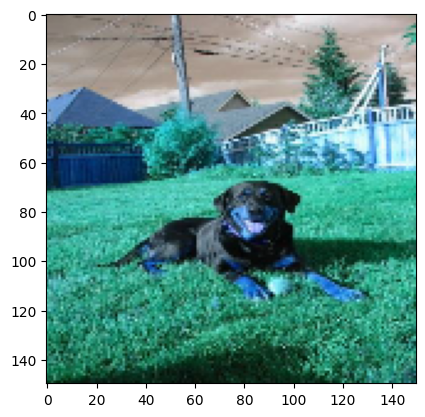

In [ ]:
IMG_SIZE = 150
for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    plt.imshow(img_arr)

In [ ]:
data = []

for category in CATEGORIES:
  path = os.path.join(DIRECTORY,category)
  label = CATEGORIES.index(category)
  for img in os.listdir(path):
    img_path = os.path.join(path,img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
    data.append([img_arr,label])

In [ ]:
len(data)

742

# **Shuffling the data and Splitting  into feature matrix (X) and target vector (y).**

In [ ]:
random.shuffle(data)
X = []
y = []

for features,label in data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)

X = X/255.0
print(X.shape)


(742, 150, 150, 3)


In [ ]:
pickle.dump(X,open('X.pkl','wb'))
pickle.dump(y,open('y.pkl','wb'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# **Vanilla Model Implementation**

In [ ]:
#Implementing the Vanilla Model using a plain architecture

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5733 - loss: 1.0861 - val_accuracy: 0.5570 - val_loss: 0.6906
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5568 - loss: 0.6927 - val_accuracy: 0.5906 - val_loss: 0.6845
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6133 - loss: 0.6655 - val_accuracy: 0.5973 - val_loss: 0.8974
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6419 - loss: 0.6194 - val_accuracy: 0.6711 - val_loss: 0.6302
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6919 - loss: 0.5530 - val_accuracy: 0.6779 - val_loss: 0.6273
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7682 - loss: 0.4681 - val_accuracy: 0.7315 - val_loss: 0.5329
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8053 - loss: 0.4093 - val_accuracy: 0.6242 - val_loss: 0.6892
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.7712 - loss: 0.4617 - val_accuracy: 0.7248 - val_loss:

# **Confusion matrix of the vanilla model**

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step


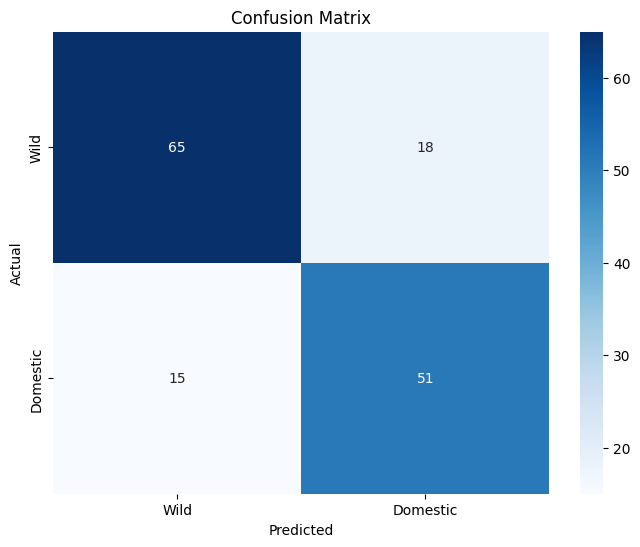

In [ ]:
# ploting the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


This confusion matrix shows that 65 times, the model predicted wild animals as the actual wild animals. 15 times, it predicted domestic animals as wild. 18 times, it predicted wild animals as domestic. Also, 51 times, it predicted domestic animals as domestic animals, which is right. At that point, we can see our model is not performing very well but is manageable.

In [ ]:
#Save the model
pickle.dump(model, open("vanilla_model.pkl", "wb"))

# **L1 regularisation with early stopping and Adam optimiser**

Using early stopping with L1 to see if the model performance increases. Also this uses Adam optimiser.

In [ ]:
from tensorflow.keras.regularizers import l1

# L1 regularization, early stopping, and Adam optimizer
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_regularizer=l1(0.01)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.01)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.01)))
model2.add(MaxPooling2D((2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

In [ ]:
model.summary()

history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5255 - loss: 216.8820 - val_accuracy: 0.5369 - val_loss: 68.9703
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.4480 - loss: 58.0448 - val_accuracy: 0.5369 - val_loss: 31.0329
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.5429 - loss: 25.5071 - val_accuracy: 0.5369 - val_loss: 15.1299
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5220 - loss: 13.0877 - val_accuracy: 0.5369 - val_loss: 9.2304
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.5388 - loss: 8.9639 - val_accuracy: 0.5369 - val_loss: 8.0262
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5252 - loss: 7.5960 - val_accuracy: 0.5369 - val_loss: 7.1637
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5297 - loss: 7.1126 - val_accuracy: 0.5369 - val_loss: 6.9792
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5320 - loss: 6.9273 - val_accuracy: 0.5369 - v

# **Confusion matrix of L1 regularization with early stopping and Adam Optimizer**

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step


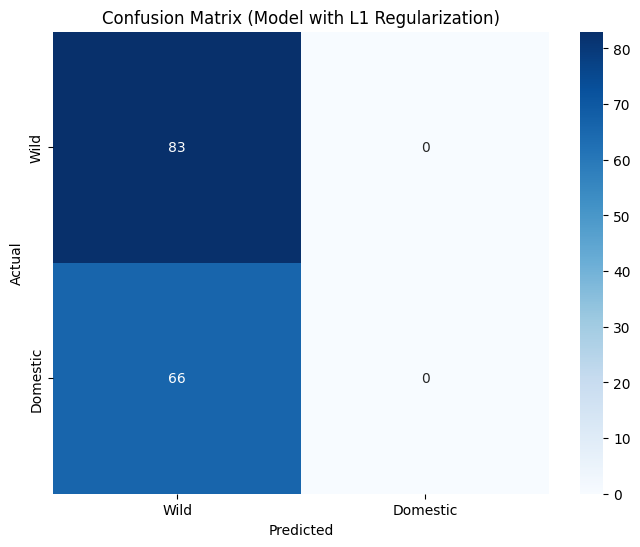

In [ ]:
#Confusion matrix
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5).astype(int)

cm2 = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model with L1 Regularization)')
plt.show()

Looking at the confusion matrix, The model does not correctly predict class 0(wild) as wild and class 1 (domestic) as domestic showing the imbalance n data.

In [ ]:
#Save the model
pickle.dump(model2, open("L1_with_earlyStop_and_Adam.pkl", "wb"))

# **L1 regularisation without early stopping**

In [ ]:
# L1 regularisation without early stopping

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_regularizer=l1(0.01)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l1(0.01)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l1(0.01)))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation='relu', kernel_regularizer=l1(0.01)))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history3 = model3.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, verbose=1)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 32s 2s/step - accuracy: 0.4506 - loss: 216.9849 - val_accuracy: 0.5369 - val_loss: 69.0014
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4926 - loss: 58.0705 - val_accuracy: 0.5369 - val_loss: 31.0651
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5090 - loss: 25.5392 - val_accuracy: 0.5369 - val_loss: 15.1704
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5210 - loss: 13.1128 - val_accuracy: 0.5369 - val_loss: 9.2470
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.5146 - loss: 8.9937 - val_accuracy: 0.5369 - val_loss: 8.0817
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5362 - loss: 7.6338 - val_accuracy: 0.5369 - val_loss: 7.2051
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5092 - loss: 7.1505 - val_accuracy: 0.5369 - val_loss: 7.0199
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.5020 - loss: 6.9584 - val_accuracy: 0.5369 - v

# **Confusion matrix for L1 regularization without early stopping**

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step


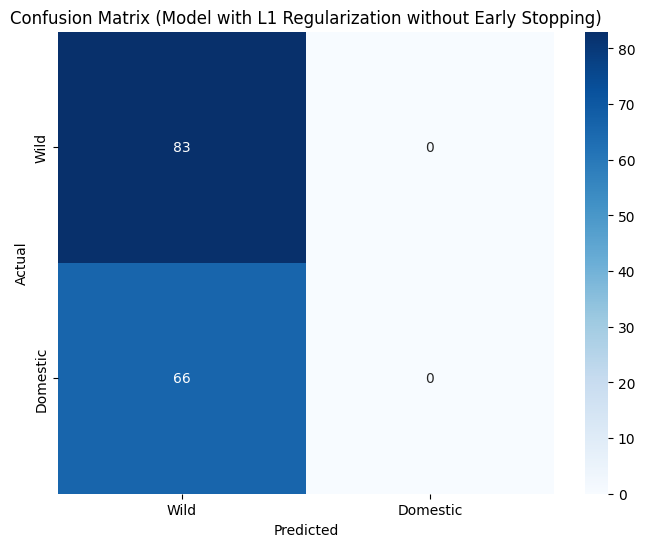

In [ ]:
y_pred3 = model3.predict(X_test)
y_pred3 = (y_pred3 > 0.5).astype(int)

cm3 = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model with L1 Regularization without Early Stopping)')
plt.show()

Just like L1 regularization with early stopping and Adam Optimizer, the model still can't predict correctly.
In this case, we will try another optimization method and see.

In [ ]:
#Save the model
pickle.dump(model3, open("L1_without_earlyStop.pkl", "wb"))

# **L2 Regularisation model without early stopping**

In [ ]:
#L2 Regularisation model without early stopping

from tensorflow.keras.regularizers import l2

model4 = Sequential()

model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_regularizer=l2(0.01)))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model4.add(MaxPooling2D((2, 2)))

model4.add(Flatten())
model4.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model4.summary()
history4 = model4.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, verbose=1)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.5196 - loss: 3.7666 - val_accuracy: 0.5369 - val_loss: 1.9934
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5091 - loss: 1.8753 - val_accuracy: 0.5369 - val_loss: 1.5028
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6216 - loss: 1.4008 - val_accuracy: 0.6443 - val_loss: 1.1828
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6692 - loss: 1.1136 - val_accuracy: 0.5503 - val_loss: 1.1394
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6343 - loss: 1.0516 - val_accuracy: 0.6711 - val_loss: 0.9655
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6895 - loss: 0.9093 - val_accuracy: 0.6913 - val_loss: 0.8957
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6851 - loss: 0.8686 - val_accuracy: 0.6309 - val_loss: 0.9007
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.6934 - loss: 0.8217 - val_accuracy: 0.5973 - val_loss:

# **Confusion matrix of L2 regularization without early stopping**

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 530ms/step


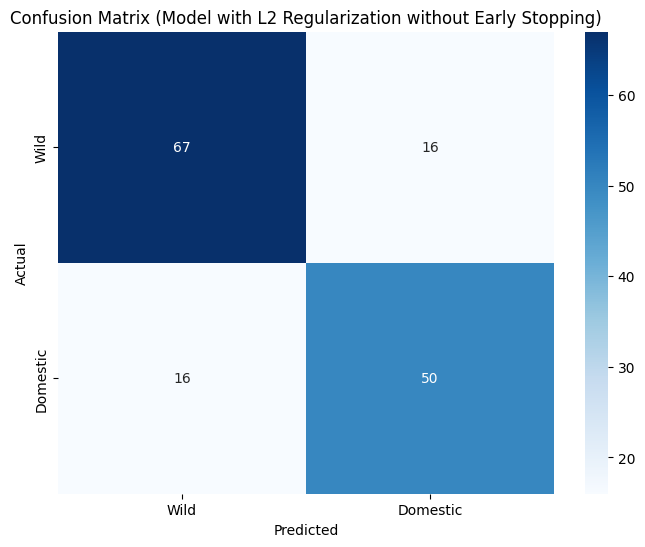

In [ ]:
# Confusion matrix
y_pred4 = model4.predict(X_test)
y_pred4 = (y_pred4 > 0.5).astype(int)

cm4 = confusion_matrix(y_test, y_pred4)

plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model with L2 Regularization without Early Stopping)')
plt.show()

In [ ]:
#Save the model
pickle.dump(model4, open("L2_without_earlyStop.pkl", "wb"))

In this technique, the model understands our data and has increased the validation to about 80% unlike the previous one.

# **L2 regularization with RMSprop optimizer and early stopping**

In [ ]:
# L2 regularization with RMSprop optimizer and early stopping

from tensorflow.keras.optimizers import RMSprop
model5 = Sequential()

model5.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_regularizer=l2(0.01)))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model5.add(MaxPooling2D((2, 2)))

model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model5.add(Dense(1, activation='sigmoid'))

# Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

model5.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model5.summary()

history5 = model5.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping], verbose=1)

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,656,964 (36.84 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,828,483 (18.42 MB)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6625 - loss: 0.6468 - val_accuracy: 0.6577 - val_loss: 0.6567
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6731 - loss: 0.6374 - val_accuracy: 0.6577 - val_loss: 0.6617
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.7039 - loss: 0.6023 - val_accuracy: 0.5503 - val_loss: 0.7061
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.6389 - loss: 0.6575 - val_accuracy: 0.6309 - val_loss: 0.6714
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.6486 - loss: 0.6375 - val_accuracy: 0.5906 - val_loss: 0.6758


# **Confusion matrix for L2 regularization with RMSprop optimizer and early stopping**

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 390ms/step


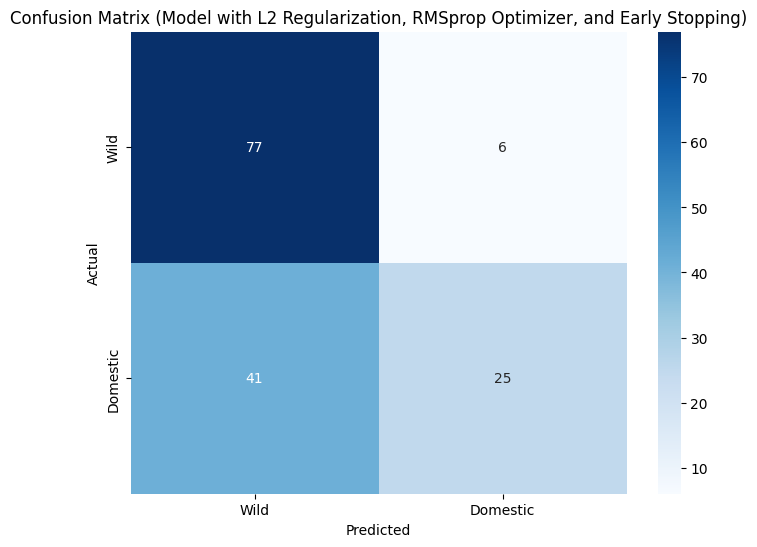

In [ ]:
# Confusion matrix for L2 regularization with RMSprop optimizer and early stopping
y_pred5 = model5.predict(X_test)
y_pred5 = (y_pred5 > 0.5).astype(int)

cm6 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model with L2 Regularization, RMSprop Optimizer, and Early Stopping)')
plt.show()

In [ ]:
#Save the model
pickle.dump(model5, open("L2_with_earlyStop_and_RMSprop.pkl", "wb"))

Nothing much changed in this technique

# **L2 Regularisation model with dropout**

In [ ]:
# L2 Regularisation model with dropout
model6 = Sequential()

model6.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), kernel_regularizer=l2(0.01)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))

model6.add(Flatten())
model6.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model6.add(Dropout(0.5))
model6.add(Dense(1, activation='sigmoid'))

#Early stopping to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)


In [ ]:
model6.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model6.summary()
history6 = model6.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32, callbacks=[early_stopping], verbose=1)

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_72 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_72 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_73 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_73 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_74 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_74 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_24 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5756 - loss: 4.2794 - val_accuracy: 0.5369 - val_loss: 2.6220
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4782 - loss: 2.4425 - val_accuracy: 0.5369 - val_loss: 1.9469
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5333 - loss: 1.8278 - val_accuracy: 0.5369 - val_loss: 1.5345
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5114 - loss: 1.4724 - val_accuracy: 0.5369 - val_loss: 1.2990
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5385 - loss: 1.2578 - val_accuracy: 0.5369 - val_loss: 1.1497
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.5069 - loss: 1.1214 - val_accuracy: 0.5369 - val_loss: 1.0510
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.4849 - loss: 1.0418 - val_accuracy: 0.5369 - val_loss: 0.9827
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5369 - loss: 0.9605 - val_accuracy: 0.5369 - val_loss:

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 408ms/step


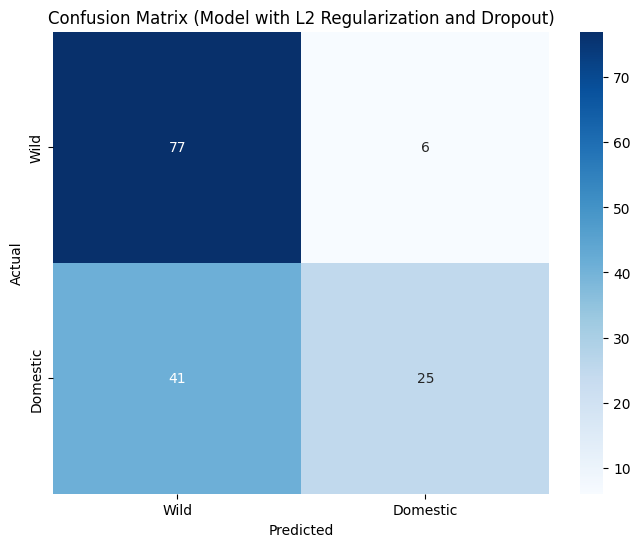

In [ ]:
# Confusion matrix
y_pred6 = model6.predict(X_test)
y_pred6 = (y_pred6 > 0.5).astype(int)

cm5 = confusion_matrix(y_test, y_pred5)

plt.figure(figsize=(8, 6))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', xticklabels=['Wild', 'Domestic'], yticklabels=['Wild', 'Domestic'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Model with L2 Regularization and Dropout)')
plt.show()

In [ ]:
#Save the model
pickle.dump(model6, open("L2_with_dropout.pkl", "wb"))

# **Model Evaluation**

In [ ]:
def evaluate_model(model, X_test, y_test):
       evaluation = model.evaluate(X_test, y_test)
       test_loss = evaluation[0]
       test_accuracy = evaluation[1]
       return test_loss, test_accuracy
       print(f"Test Loss: {test_loss}")
       print(f"Test Accuracy: {test_accuracy}")

In [ ]:
test_loss, test_accuracy = evaluate_model(model4, X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - accuracy: 0.7934 - loss: 0.6038


# **Model performance**

Test Loss: 0.619326114654541
Test Accuracy: 0.7852349281311035


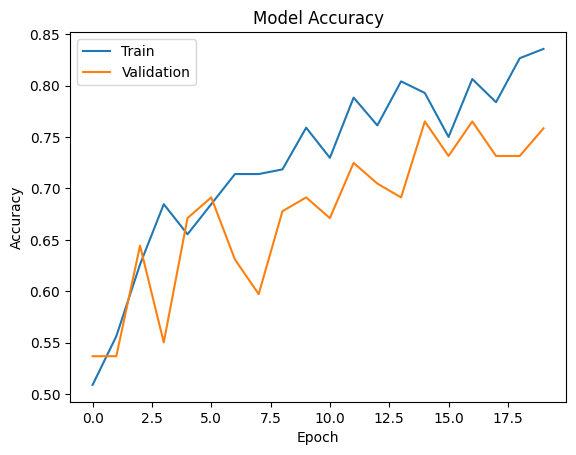

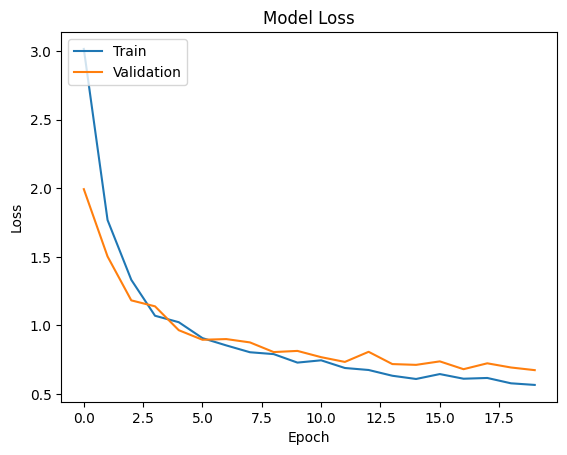

In [ ]:
# Analyze model performance
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Analyze training history for model4
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Looking at the graph, **Model4** using L2 Regularisation model without early stopping is the best perfoming model

# **Comparision between the models**

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 371ms/step - accuracy: 0.8125 - loss: 0.8887
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.5503 - loss: 6.6462
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 655ms/step - accuracy: 0.5503 - loss: 6.9060
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.7934 - loss: 0.6038
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.6757 - loss: 0.6497
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 378ms/step - accuracy: 0.6629 - loss: 0.6900
                                    Model  Test Accuracy
0                           Vanilla Model       0.778524
1     L1 Reg with Early Stopping and Adam       0.557047
2           L1 Reg without Early Stopping       0.557047
3           L2 Reg without Early Stopping       0.785235
4  L2 Reg with RMSprop and Early Stopping       0.684564
5                     L2 Reg with Dropout       0.671141


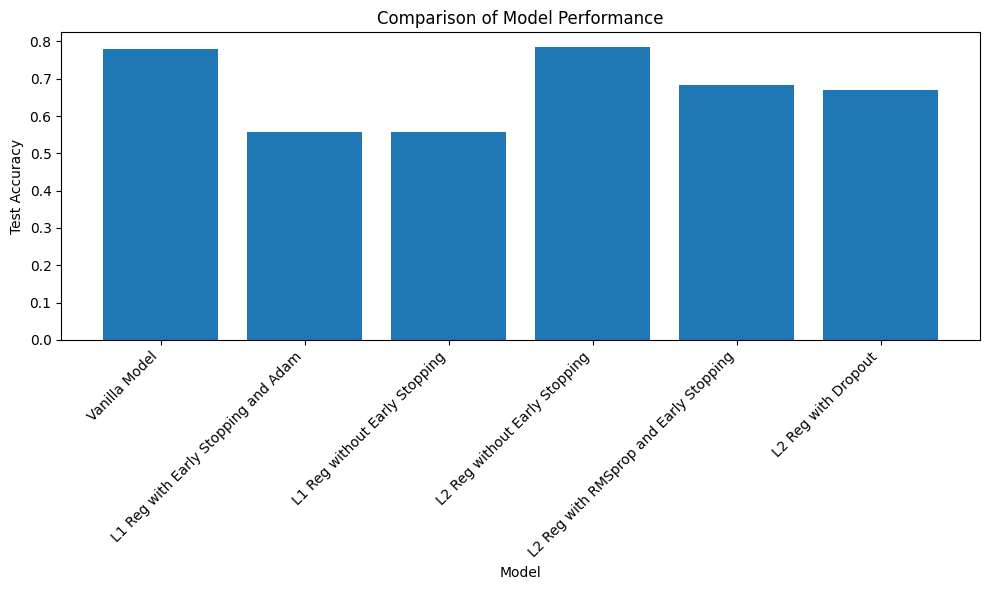

In [ ]:
# Comparing the performance of different models.
model_performances = {
    "Vanilla Model": evaluate_model(model, X_test, y_test)[1],
    "L1 Reg with Early Stopping and Adam": evaluate_model(model2, X_test, y_test)[1],
    "L1 Reg without Early Stopping": evaluate_model(model3, X_test, y_test)[1],
    "L2 Reg without Early Stopping": evaluate_model(model4, X_test, y_test)[1],
    "L2 Reg with RMSprop and Early Stopping": evaluate_model(model5, X_test, y_test)[1],
    "L2 Reg with Dropout": evaluate_model(model6, X_test, y_test)[1]
}

# Display the results in a table
df_performance = pd.DataFrame(list(model_performances.items()), columns=['Model', 'Test Accuracy'])

# Print the DataFrame
print(df_performance)

#Visualizing the performance using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_performance['Model'], df_performance['Test Accuracy'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Performance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In the above comparison, you can deduce that L2 regularization without early stopping is the best performing model.